# Exploratory Data Analysis for Machine Learning  
Shanshan Wang  
shanshan.wang@uni-due.de  
Feb.15, 2021

## Contents
<div class="alert alert-block alert-info" style="margin-top: 20px">

<ol>
<li>  <a href="#data">Data exploration</a>
    <ul>
    <li>Initial plan for data exploration
    <li>Reading a dataset
    <li>Brief description of the dataset and a summary of its attributes
    <li>Data cleaning and feature engineering 
    <li>Key Findings and Insights
    </ul>
    <br>
<li><a href="#tests">Hypothesis tests</a>
    <ul>
    <li>Three hypotheses about this data
    <li>Significance tests and the results
    <li>Suggestions for next steps
    </ul>
    <br>
<li><a href="#summary">Summary</a> 
    <ul>
    <li>The quality of this data set
    <li>A request for additional data if needed
    </ul>
</ol>
    
</div>



## <a name="data"></a>1 Data Exploration 

### <a name="plan"></a> Initial plan for data exploration 
<ol>
    <li> Load a stock dataset by YahooFinancials  
    <li> Check the information of the dataset
    <li> Filter out the tickers with missing data
    <li> Calculate returns of stock prices for each ticker
    <li> Normalize the prices and the returns for each ticker
    <li> Group the tickers by their industrial sectors 
    <li> Calculate the mean return of tickers for each sector and for the whole market
    <li> Visualize the trends of prices and the trends of returns for the sectors and the market with lineplots
    <li> Visualize the relationships of returns among sectors and the market with pairplots
    <li> Seperate the feature data from the target data
    <li> Add polynomial and interaction terms for the basic feature engineering
</ol>


### <a name="datareading"></a>Reading datasets 
#### Load NASDAQ-100 company symbols from Wikipedia

In [22]:
import pandas as pd
import numpy as np

In [122]:
URL = "https://en.wikipedia.org/wiki/NASDAQ-100#Changes_in_2020"
tables = pd.read_html(URL)
df_NASDAQ100=tables[3]
df_NASDAQ100.head(10)

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Activision Blizzard,ATVI,Communication Services,Interactive Home Entertainment
1,Adobe Inc.,ADBE,Information Technology,Application Software
2,Advanced Micro Devices,AMD,Information Technology,Semiconductors
3,Alexion Pharmaceuticals,ALXN,Health Care,Pharmaceuticals
4,Align Technology,ALGN,Health Care,Health Care Supplies
5,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
6,Alphabet Inc. (Class C),GOOG,Communication Services,Interactive Media & Services
7,Amazon.com,AMZN,Consumer Discretionary,Internet & Direct Marketing Retail
8,American Electric Power,AEP,Utilities,Electric Utilities
9,Amgen,AMGN,Health Care,Biotechnology


In [17]:
! pip install yahoofinancials

  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15191 sha256=d85e40221ce3f51ba886fc1cf53caaae4ecb3b83c91c90a57764081b42119112
  Stored in directory: /Users/working/Library/Caches/pip/wheels/6a/90/0c/08c7ac2ce60b9ac91529417d471e59244f9f96848c86f14809
Successfully built yahoofinancials


#### Load price data of stocks by YahooFinancials

In [19]:
from yahoofinancials import YahooFinancials

In [53]:
assets = df_NASDAQ100['Ticker']
yahoo_financials = YahooFinancials(assets)
data = yahoo_financials.get_historical_price_data(start_date='2010-01-01', 
                                                  end_date='2020-12-31', 
                                                  time_interval='daily')
prices_df = pd.DataFrame({
    a: {x['formatted_date']: x['adjclose'] for x in data[a]['prices']} for a in assets
})

In [54]:
prices_df.head()

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AEP,AMGN,...,TXN,TCOM,VRSN,VRSK,VRTX,WBA,WDAY,XEL,XLNX,ZM
2010-01-04,10.126624,37.090000,9.70,24.125000,18.50,313.688690,312.204773,133.899994,22.445042,45.675011,...,19.632912,18.125000,21.007998,29.455685,44.240002,28.596109,NaN,14.271184,19.830650,NaN
2010-01-05,10.144546,37.700001,9.71,23.780001,18.01,312.307312,310.829926,134.690002,22.188086,45.279354,...,19.519688,19.137501,21.228777,29.653036,42.779999,28.366116,NaN,14.101936,19.580618,NaN
2010-01-06,10.090778,37.619999,9.57,23.840000,17.48,304.434448,302.994293,132.250000,22.412928,44.939075,...,19.376272,18.732500,20.999506,30.037886,42.029999,28.151457,NaN,14.129019,19.447794,NaN
2010-01-07,9.848815,36.889999,9.47,23.930000,17.43,297.347351,295.940735,130.000000,22.605635,44.527592,...,19.436659,18.277500,20.710794,29.988546,41.500000,28.320110,NaN,14.068089,19.252451,NaN
2010-01-08,9.768159,36.689999,9.43,23.975000,17.66,301.311310,299.885956,133.520004,22.875437,44.923252,...,19.882002,18.195000,20.872135,29.603697,40.669998,28.358456,NaN,14.074859,19.533739,NaN


In [56]:
prices_df.shape

(2768, 102)

### <a name="datadescription"></a>Brief description of the data set and a summary of its attributes 

The dataset contains adjusted prices of 102 stocks during 2768 days from Jan. 4, 2010 to Dec. 30, 2020. The 102 stocks are from NASDAQ-100 index. Their company names are listed in Wikipedia and updated on December 21, 2020. The companies added to NASDAQ-100 index latest may not have the data in early time. Therefore, we find some of the stocks in the dataset contain the missing data.

A row in the dataset represents the data from all stocks in one trading day and a column indicates a time series of a stock. The dataset lists the stock prices in the data type of float64, where 19 of 102 stocks contain missing data. We list a description of the dataset, such as the mean values, standard deviation, minimum value and maximum value, for different stocks in the following table. 

In [59]:
prices_df.describe()

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AEP,AMGN,...,TXN,TCOM,VRSN,VRSK,VRTX,WBA,WDAY,XEL,XLNX,ZM
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,...,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2067.000000,2768.000000,2768.000000,430.000000
mean,34.055565,132.808602,14.538689,112.321461,119.313551,727.292646,720.068428,858.503042,49.947370,123.477973,...,59.620197,29.898676,89.148752,80.471279,111.694823,50.815367,112.863445,33.979156,52.293613,186.974500
std,23.239323,122.360323,18.829283,42.928740,114.930393,396.807923,396.395423,815.563986,20.817222,58.497141,...,37.405091,12.768260,60.077680,43.077067,66.203490,18.036453,48.479947,15.859582,29.071420,142.661358
min,8.970576,22.690001,1.620000,22.750000,13.270000,218.253250,217.220810,108.610001,20.396944,38.197033,...,17.070547,6.240000,19.420086,26.880157,26.600000,20.371281,46.990002,13.567111,18.189817,62.000000
25%,11.439198,35.147501,3.760000,92.822502,31.495000,341.101105,339.487526,243.910000,31.760374,68.328365,...,26.536866,20.245001,43.169998,48.303371,53.110000,32.916608,78.994999,21.058274,29.652528,78.342499
50%,24.761034,79.615002,7.410000,116.165001,59.750000,606.626648,599.727081,439.745010,46.684946,131.830147,...,46.230007,29.067500,66.504997,71.690285,92.494999,51.492249,89.949997,29.279489,41.280615,106.084999
75%,53.664557,219.700001,13.835000,136.017494,204.609993,1064.814972,1056.012543,1500.062500,64.317549,166.538086,...,92.733946,40.845000,120.277498,102.919720,158.369999,68.552670,144.985001,43.777712,68.020285,260.404999
max,91.580002,533.799988,97.120003,207.839996,536.590027,1824.969971,1827.989990,3531.449951,100.791359,255.564468,...,165.675369,59.730000,221.039993,207.979996,303.100006,83.684784,257.709991,74.218712,152.110001,568.340027


In [60]:
prices_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2768 entries, 2010-01-04 to 2020-12-30
Columns: 102 entries, ATVI to ZM
dtypes: float64(102)
memory usage: 2.2+ MB


In [345]:
# check missing data 
nan=prices_df.isna().sum()
ticker_nan=nan.index[nan>0]
nan[ticker_nan]

TEAM    1494
CDW      876
CHTR       1
DOCU    2093
FB       599
FOXA    2311
FOX     2312
JD      1103
KHC     1384
MRNA    2248
NXPI     149
OKTA    1828
PYPL    1384
PTON    2449
PDD     2155
SPLK     578
TSLA     122
WDAY     701
ZM      2338
dtype: int64

### <a name="dataprocessing"></a>Data cleaning and feature engineering 

#### Data cleaning by removing the tickers with missing data and grouping the tickers by sectors

In [586]:
# drop the columns with missing data
# for stock price
df_price=prices_df.copy()
df_price.drop(columns=idx_nan,inplace=True)
df_price.head()

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AEP,AMGN,...,SNPS,TMUS,TXN,TCOM,VRSN,VRSK,VRTX,WBA,XEL,XLNX
2010-01-04,10.126624,37.090000,9.70,24.125000,18.50,313.688690,312.204773,133.899994,22.445042,45.675011,...,22.440001,13.207044,19.632912,18.125000,21.007998,29.455685,44.240002,28.596109,14.271184,19.830650
2010-01-05,10.144546,37.700001,9.71,23.780001,18.01,312.307312,310.829926,134.690002,22.188086,45.279354,...,22.250000,13.240186,19.519688,19.137501,21.228777,29.653036,42.779999,28.366116,14.101936,19.580618
2010-01-06,10.090778,37.619999,9.57,23.840000,17.48,304.434448,302.994293,132.250000,22.412928,44.939075,...,22.209999,12.345354,19.376272,18.732500,20.999506,30.037886,42.029999,28.151457,14.129019,19.447794
2010-01-07,9.848815,36.889999,9.47,23.930000,17.43,297.347351,295.940735,130.000000,22.605635,44.527592,...,22.150000,12.461351,19.436659,18.277500,20.710794,29.988546,41.500000,28.320110,14.068089,19.252451
2010-01-08,9.768159,36.689999,9.43,23.975000,17.66,301.311310,299.885956,133.520004,22.875437,44.923252,...,22.309999,11.765371,19.882002,18.195000,20.872135,29.603697,40.669998,28.358456,14.074859,19.533739


In [621]:
# stock return = (price at day (t+1) - price at day t)/price at day t
df_return=pd.DataFrame((np.matrix(df_price.iloc[1:,])-np.matrix(df_price.iloc[0:-1,]))
                       /np.matrix(df_price.iloc[0:-1,]),index=df_price.iloc[0:-1,].index,columns=df_price.columns)
df_return.head()


,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AEP,AMGN,...,SNPS,TMUS,TXN,TCOM,VRSN,VRSK,VRTX,WBA,XEL,XLNX
2010-01-04,0.001770,0.016446,0.001031,-0.014300,-0.026486,-0.004404,-0.004404,0.005900,-0.011448,-0.008662,...,-0.008467,0.002509,-0.005767,0.055862,0.010509,0.006700,-0.033002,-0.008043,-0.011859,-0.012608
2010-01-05,-0.005300,-0.002122,-0.014418,0.002523,-0.029428,-0.025209,-0.025209,-0.018116,0.010133,-0.007515,...,-0.001798,-0.067585,-0.007347,-0.021163,-0.010800,0.012978,-0.017532,-0.007567,0.001920,-0.006783
2010-01-06,-0.023979,-0.019405,-0.010449,0.003775,-0.002860,-0.023280,-0.023280,-0.017013,0.008598,-0.009156,...,-0.002701,0.009396,0.003117,-0.024289,-0.013748,-0.001643,-0.012610,0.005991,-0.004312,-0.010044
2010-01-07,-0.008189,-0.005422,-0.004224,0.001880,0.013196,0.013331,0.013331,0.027077,0.011935,0.008886,...,0.007223,-0.055851,0.022913,-0.004514,0.007790,-0.012833,-0.020000,0.001354,0.000481,0.014611
2010-01-08,-0.000917,-0.013083,-0.030753,-0.006048,-0.006795,-0.001512,-0.001512,-0.024041,0.010391,0.004404,...,-0.008516,0.012676,-0.012908,0.011816,-0.002848,-0.002333,0.028522,0.001622,0.009620,-0.010400


Data normalization

In [388]:
# normalize each time series of prices to zero mean and one standard deviation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
price_scaled=scaler.fit_transform(df_price.values)
df_price_scaled=pd.DataFrame(price_scaled,index=df_price.index,columns=df_price.columns)
df_price_scaled.head()

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AEP,AMGN,...,SNPS,TMUS,TXN,TCOM,VRSN,VRSK,VRTX,WBA,XEL,XLNX
2010-01-04,-1.029861,-0.782410,-0.257023,-2.054856,-0.877329,-1.042516,-1.029117,-0.888629,-1.321372,-1.330270,...,-0.893604,-1.118901,-1.069226,-0.922272,-1.134416,-1.184501,-1.019085,-1.232131,-1.242878,-1.116864
2010-01-05,-1.029089,-0.777423,-0.256492,-2.062894,-0.881593,-1.045998,-1.032586,-0.887660,-1.333718,-1.337035,...,-0.897458,-1.117718,-1.072254,-0.842959,-1.130740,-1.179918,-1.041143,-1.244885,-1.253552,-1.125466
2010-01-06,-1.031403,-0.778077,-0.263929,-2.061497,-0.886206,-1.065842,-1.052357,-0.890653,-1.322915,-1.342853,...,-0.898269,-1.149679,-1.076089,-0.874684,-1.134557,-1.170983,-1.052473,-1.256788,-1.251844,-1.130036
2010-01-07,-1.041817,-0.784044,-0.269240,-2.059400,-0.886641,-1.083706,-1.070154,-0.893412,-1.313656,-1.349889,...,-0.899486,-1.145536,-1.074474,-0.910326,-1.139364,-1.172128,-1.060480,-1.247436,-1.255687,-1.136757
2010-01-08,-1.045288,-0.785679,-0.271365,-2.058351,-0.884639,-1.073714,-1.060200,-0.889095,-1.300693,-1.343124,...,-0.896241,-1.170394,-1.062566,-0.916788,-1.136678,-1.181064,-1.073020,-1.245310,-1.255260,-1.127079


In [629]:
# normalize each time series of returns to zero mean and one standard deviation
return_scaled=scaler.fit_transform(df_return.values)
df_return_scaled=pd.DataFrame(return_scaled,index=df_return.index,columns=df_return.columns)
df_return_scaled.head()

,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AEP,AMGN,...,SNPS,TMUS,TXN,TCOM,VRSN,VRSK,VRTX,WBA,XEL,XLNX
2010-01-04,0.040193,0.799966,-0.011888,-0.650458,-1.001524,-0.315414,-0.314726,0.227271,-0.990760,-0.597450,...,-0.646070,0.057210,-0.395545,1.923739,0.569286,0.431979,-1.126201,-0.469700,-1.050493,-0.695288
2010-01-05,-0.322129,-0.169364,-0.437143,0.067271,-1.106432,-1.588358,-1.584135,-0.973951,0.793420,-0.524231,...,-0.190391,-2.849454,-0.489232,-0.758863,-0.703769,0.891366,-0.614032,-0.442847,0.109228,-0.395479
2010-01-06,-1.279388,-1.071558,-0.327894,0.120687,-0.158949,-1.470323,-1.466424,-0.918808,0.666485,-0.628979,...,-0.252134,0.342784,0.131156,-0.867758,-0.879917,-0.178430,-0.451096,0.322986,-0.415330,-0.563324
2010-01-07,-0.470204,-0.341606,-0.156533,0.039855,0.413654,0.769675,0.767352,1.286506,0.942369,0.522415,...,0.425990,-2.362891,1.304848,-0.179019,0.406841,-0.997234,-0.695755,0.061072,-0.011905,0.705665
2010-01-08,-0.097517,-0.741533,-0.886776,-0.298390,-0.299268,-0.138461,-0.138268,-1.270344,0.814694,0.236384,...,-0.649435,0.478804,-0.818929,0.389726,-0.228693,-0.228971,0.910655,0.076184,0.757205,-0.581635


Group the tickers by GICS Sector

In [375]:
# drop the tickers with missing data
df_NAS=df_NASDAQ100.copy()
df_NAS.set_index(['Ticker'],inplace=True)
df_NAS.drop(ticker_nan.tolist(),axis=0,inplace=True)
df_NAS.reset_index(inplace=True)
df_NAS.head()

,Ticker,Company,GICS Sector,GICS Sub-Industry
0,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment
1,ADBE,Adobe Inc.,Information Technology,Application Software
2,AMD,Advanced Micro Devices,Information Technology,Semiconductors
3,ALXN,Alexion Pharmaceuticals,Health Care,Pharmaceuticals
4,ALGN,Align Technology,Health Care,Health Care Supplies


In [378]:
# group tickers by sectors and separate tickers by comma
df_sector=df_NAS.groupby(['GICS Sector']).agg({','.join})
df_sector

,Ticker,Company,GICS Sub-Industry
,join,join,join
GICS Sector,,,
Communication Services,"ATVI,GOOGL,GOOG,BIDU,CMCSA,EA,MTCH,NTES,NFLX,S...","Activision Blizzard,Alphabet Inc. (Class A),Al...","Interactive Home Entertainment,Interactive Med..."
Consumer Discretionary,"AMZN,BKNG,DLTR,EBAY,LULU,MAR,MELI,ORLY,ROST,SB...","Amazon.com,Booking Holdings,Dollar Tree, Inc.,...","Internet & Direct Marketing Retail,Internet & ..."
Consumer Staples,"COST,KDP,MDLZ,MNST,PEP,WBA","Costco Wholesale Corporation,Keurig Dr Pepper ...","Hypermarkets & Super Centers,Soft Drinks,Packa..."
Health Care,"ALXN,ALGN,AMGN,BIIB,CERN,DXCM,GILD,IDXX,ILMN,I...","Alexion Pharmaceuticals,Align Technology,Amgen...","Pharmaceuticals,Health Care Supplies,Biotechno..."
Industrials,"CTAS,CPRT,CSX,FAST,PCAR,VRSK","Cintas Corporation,Copart,CSX Corporation,Fast...","Diversified Support Services,Diversified Suppo..."
Information Technology,"ADBE,AMD,ADI,ANSS,AAPL,AMAT,ASML,ADSK,ADP,AVGO...","Adobe Inc.,Advanced Micro Devices,Analog Devic...","Application Software,Semiconductors,Semiconduc..."
Utilities,"AEP,EXC,XEL","American Electric Power,Exelon Corporation,Xce...","Electric Utilities,Multi-Utilities,Multi-Utili..."


In [377]:
# extract the list of tickers for each sector
sec_CSe=df_sector['Ticker'].loc['Communication Services'][0].split(",")
sec_CD=df_sector['Ticker'].loc['Consumer Discretionary'][0].split(",")
sec_CSt=df_sector['Ticker'].loc['Consumer Staples'][0].split(",")
sec_HC=df_sector['Ticker'].loc['Health Care'][0].split(",")
sec_I=df_sector['Ticker'].loc['Industrials'][0].split(",")
sec_IT=df_sector['Ticker'].loc['Information Technology'][0].split(",")
sec_U=df_sector['Ticker'].loc['Utilities'][0].split(",")
sec_I

['CTAS', 'CPRT', 'CSX', 'FAST', 'PCAR', 'VRSK']

#### Obtain the data of sectors and the whole market

In [430]:
# average the price values over all tickers in the same sector
df_price_sector=pd.DataFrame({'Communication Services':df_price_scaled[sec_CSe].mean(axis=1),
                             'Consumer Discretionary':df_price_scaled[sec_CD].mean(axis=1),
                             'Consumer Staples':df_price_scaled[sec_CSt].mean(axis=1),
                             'Health Care':df_price_scaled[sec_HC].mean(axis=1),
                             'Industrials':df_price_scaled[sec_I].mean(axis=1),
                             'Information Technology':df_price_scaled[sec_IT].mean(axis=1),
                             'Utilities':df_price_scaled[sec_U].mean(axis=1),
                             'Market':df_price_scaled.mean(axis=1)},
                             columns=['Communication Services','Consumer Discretionary',
                                    'Consumer Staples','Health Care','Industrials',
                                   'Information Technology','Utilities','Market'])
df_price_sector.index.name = 'Date'
df_price_sector.reset_index(drop=False,inplace=True)
df_price_sector.head()


,Date,Communication Services,Consumer Discretionary,Consumer Staples,Health Care,Industrials,Information Technology,Utilities,Market
0,2010-01-04,-1.254160,-1.290937,-1.343075,-1.330187,-1.216274,-0.987269,-0.866710,-1.158645
1,2010-01-05,-1.252664,-1.282067,-1.333377,-1.326515,-1.204676,-0.985700,-0.899193,-1.155681
2,2010-01-06,-1.259577,-1.283297,-1.332764,-1.321205,-1.188785,-0.987211,-0.886030,-1.154779
3,2010-01-07,-1.265850,-1.287723,-1.334777,-1.321150,-1.182965,-0.991318,-0.879263,-1.157251
4,2010-01-08,-1.266347,-1.288551,-1.335954,-1.321156,-1.176720,-0.984471,-0.881933,-1.154518


In [635]:
# average the return values over all tickers in the same sector
df_return_sector=pd.DataFrame({'Communication Services':df_return_scaled[sec_CSe].mean(axis=1),
                             'Consumer Discretionary':df_return_scaled[sec_CD].mean(axis=1),
                             'Consumer Staples':df_return_scaled[sec_CSt].mean(axis=1),
                             'Health Care':df_return_scaled[sec_HC].mean(axis=1),
                             'Industrials':df_return_scaled[sec_I].mean(axis=1),
                             'Information Technology':df_return_scaled[sec_IT].mean(axis=1),
                             'Utilities':df_return_scaled[sec_U].mean(axis=1),
                             'Market':df_return_scaled.mean(axis=1)},
                             columns=['Communication Services','Consumer Discretionary',
                                    'Consumer Staples','Health Care','Industrials',
                                   'Information Technology','Utilities','Market'])
df_return_sector.index.name = 'Date'
df_return_sector.reset_index(drop=False,inplace=True)
df_return_sector.head()

,Date,Communication Services,Consumer Discretionary,Consumer Staples,Health Care,Industrials,Information Technology,Utilities,Market
0,2010-01-04,0.203273,0.529399,0.538763,0.225331,0.622932,-0.077376,-1.057180,0.151043
1,2010-01-05,-0.635101,-0.018358,0.418014,0.504500,0.876445,-0.201371,0.432996,0.030082
2,2010-01-06,-0.638046,-0.241502,-0.343008,0.083460,0.185111,-0.315142,0.153943,-0.229840
3,2010-01-07,-0.083276,-0.096367,-0.214649,-0.036092,0.472770,0.415070,0.197556,0.155931
4,2010-01-08,-0.036033,-0.439713,-0.167846,0.184309,-0.282452,-0.192113,0.782467,-0.110300


#### Line plots of features for the sectors and the market

In [509]:
import matplotlib.pyplot as plt
import seaborn as sns

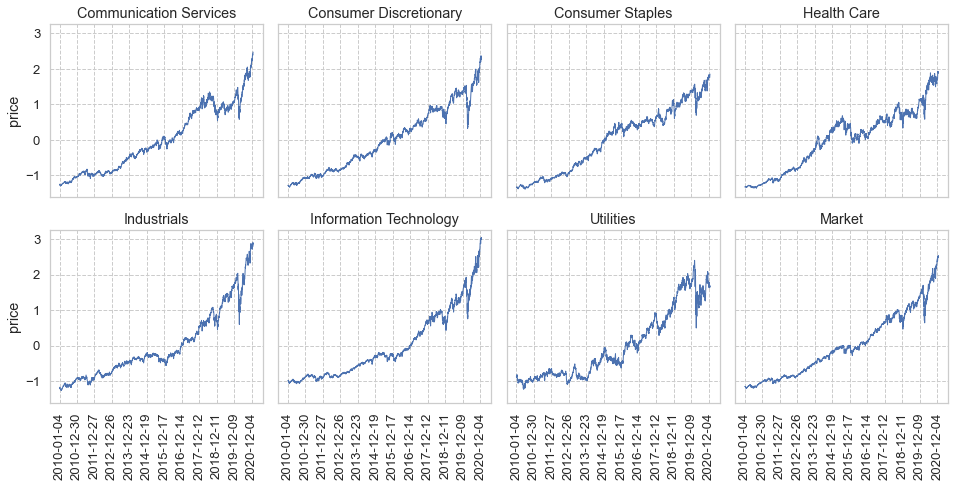

In [515]:
fig, axes=plt.subplots(2,4,figsize=(15, 7),sharex=True, sharey=True)
length=df_price_sector.shape
for i in range(length[1]-1):
    sns.lineplot(data=df_price_sector, x=range(length[0]), y=df_price_sector.columns[i+1],linewidth=1,ax=axes[int(i/4),i%4]).set(title=df_price_sector.columns[i+1], ylabel='price')
    axes[int(i/4),i%4].set_xticks(np.array(np.arange(0, length[0], step=250)))
    axes[int(i/4),i%4].set_xticklabels(df_price_sector['Date'].iloc[np.arange(0, length[0], step=250)],rotation = 90)
    sns.set(font_scale=1.2)
    sns.set_style("whitegrid",{'grid.linestyle':'--'})
fig.tight_layout(rect=[0, 0, .9, 1])
plt.show()

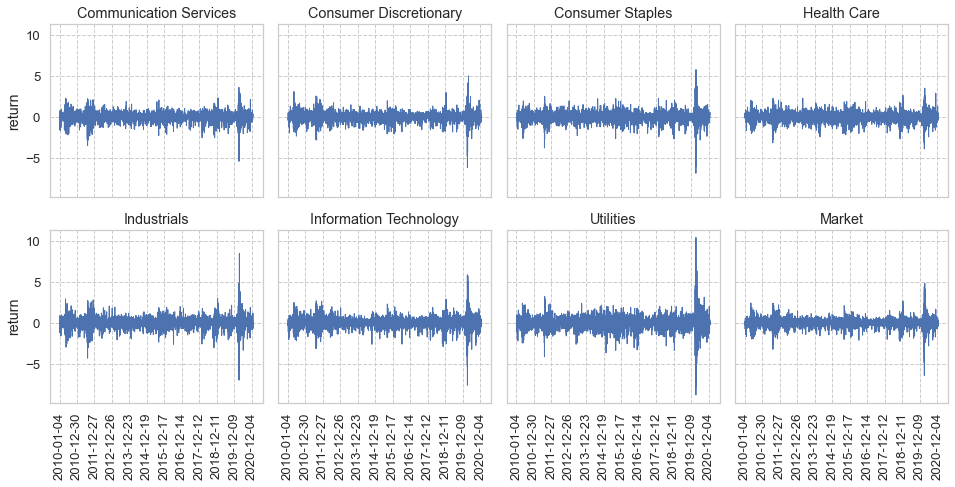

In [633]:
sns.set_style("whitegrid",{'grid.linestyle':'--'})
fig, axes=plt.subplots(2,4,figsize=(15, 7),sharex=True, sharey=True)
length=df_return_sector.shape
for i in range(length[1]-1):
    sns.lineplot(data=df_return_sector, x=range(length[0]), y=df_return_sector.columns[i+1],linewidth=1,ax=axes[int(i/4),i%4]).set(title=df_return_sector.columns[i+1], ylabel='return')
    axes[int(i/4),i%4].set_xticks(np.array(np.arange(0, length[0], step=250)))
    axes[int(i/4),i%4].set_xticklabels(df_return_sector['Date'].iloc[np.arange(0, length[0], step=250)],rotation = 90)
    sns.set(font_scale=1.2)
fig.tight_layout(rect=[0, 0, .9, 1])
plt.show()

#### Pair plots of features
With filtered dataset, we can use pair plots to visualize the target and feature-target relationships

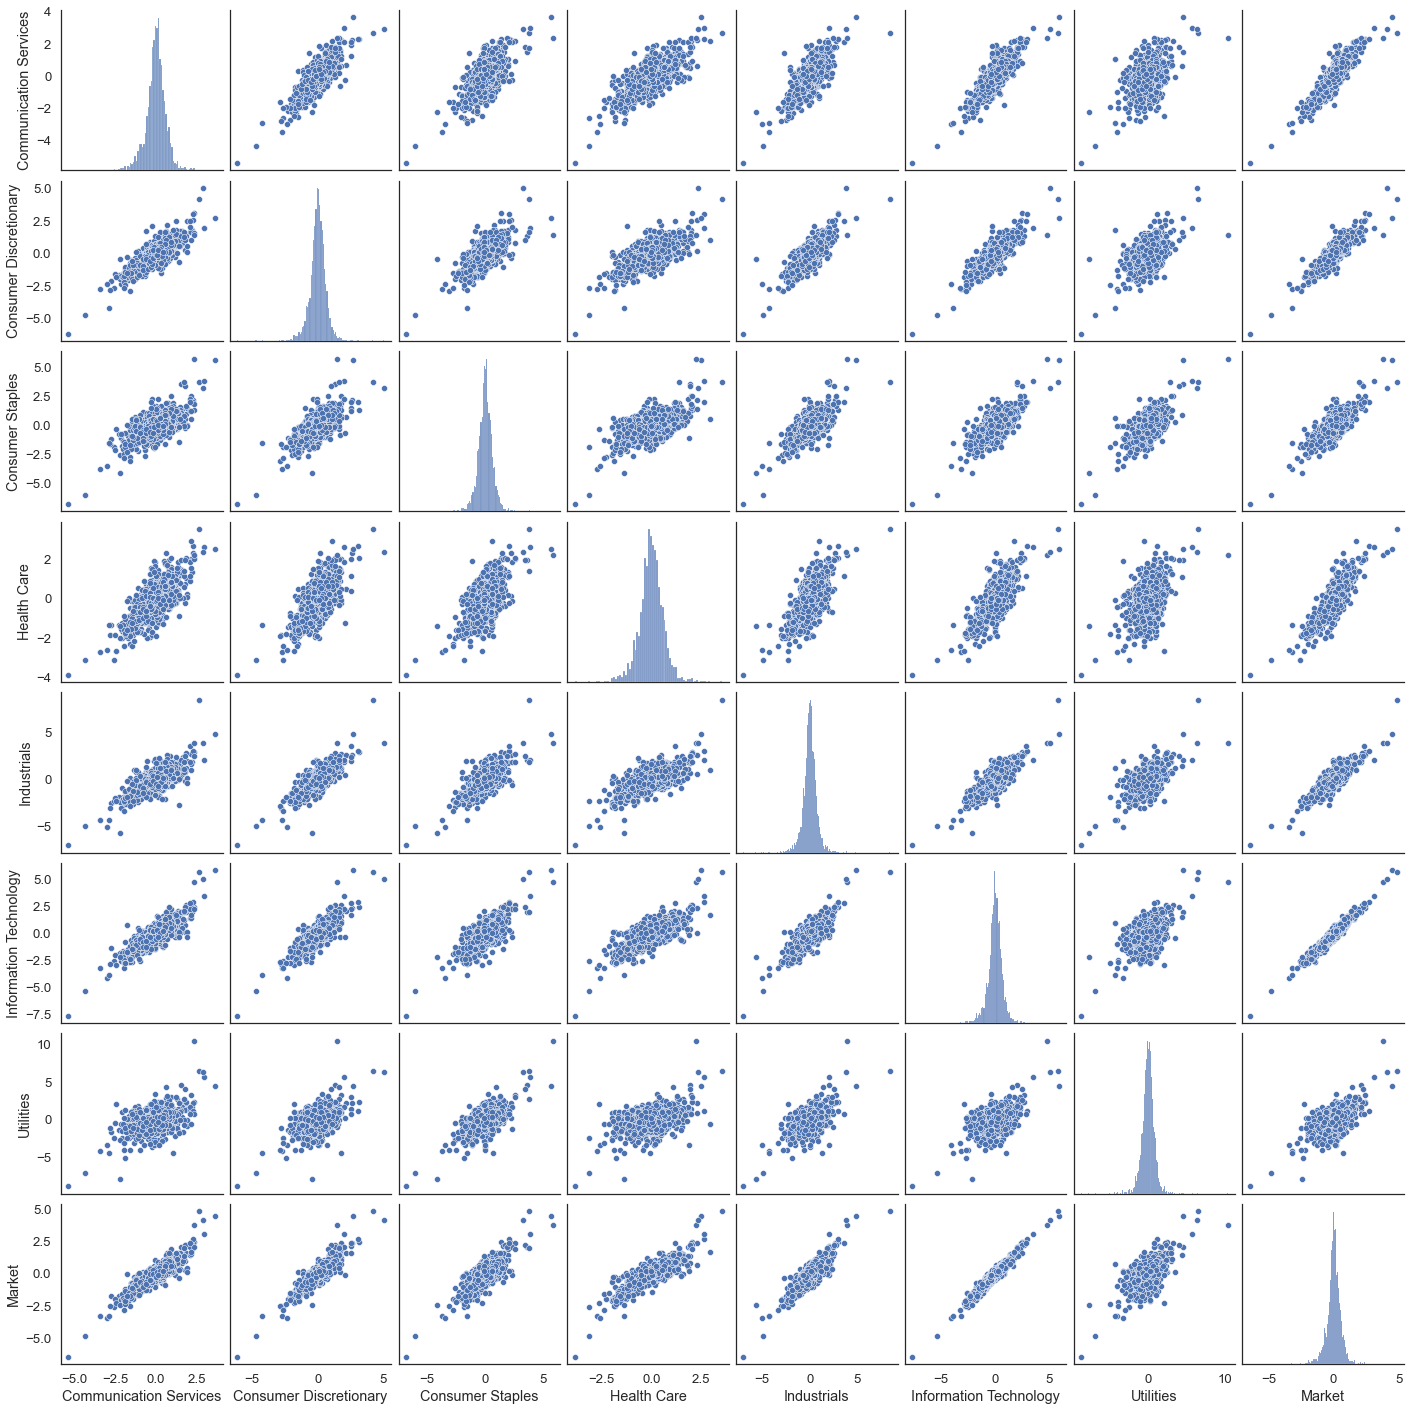

In [636]:
sns.set_style("white")
sns.pairplot(df_return_sector)

#### Separate our features from our target
We refer the scaled prices avearged over all tickers in each sector or the market as an index of that sector or the market. Thus, we further consider the return of indices of 7 sectors at day $t$ as the features, and the return of the index of the market at day $t+1$ as the target. The target return reflects the trend of the whole market. If the target return is larger (smaller) than 0, there is a upward (downward) trend for the market. If the traget return is equal to zero, the market keeps stable. 

In [639]:
#Separate our features X from our target y
X = df_return_sector.loc[0:df_return_sector.shape[0]-2,['Communication Services','Consumer Discretionary','Consumer Staples',
                           'Health Care','Industrials','Information Technology','Utilities']]
y = df_return_sector.loc[1:df_return_sector.shape[0]-1,['Market']]
print(X.shape,y.shape)

(2766, 7) (2766, 1)


In [643]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2766 entries, 0 to 2765
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Communication Services  2766 non-null   float64
 1   Consumer Discretionary  2766 non-null   float64
 2   Consumer Staples        2766 non-null   float64
 3   Health Care             2766 non-null   float64
 4   Industrials             2766 non-null   float64
 5   Information Technology  2766 non-null   float64
 6   Utilities               2766 non-null   float64
dtypes: float64(7)
memory usage: 151.4 KB


#### Basic feature engineering: adding polynomial and interaction terms
we will add quadratic **polynomial terms or transformations** for those features, allowing us to express that non-linear relationship while still using linear regression as our model.

#### Polynomial Features

In [644]:
X2 = X.copy()
for sector in X.columns:
    X2[sector+'_2']=X2[sector]**2
X2.head()

,Communication Services,Consumer Discretionary,Consumer Staples,Health Care,Industrials,Information Technology,Utilities,Communication Services_2,Consumer Discretionary_2,Consumer Staples_2,Health Care_2,Industrials_2,Information Technology_2,Utilities_2
0,0.203273,0.529399,0.538763,0.225331,0.622932,-0.077376,-1.057180,0.041320,0.280263,0.290265,0.050774,0.388044,0.005987,1.117630
1,-0.635101,-0.018358,0.418014,0.504500,0.876445,-0.201371,0.432996,0.403354,0.000337,0.174736,0.254521,0.768156,0.040550,0.187485
2,-0.638046,-0.241502,-0.343008,0.083460,0.185111,-0.315142,0.153943,0.407102,0.058323,0.117655,0.006966,0.034266,0.099315,0.023698
3,-0.083276,-0.096367,-0.214649,-0.036092,0.472770,0.415070,0.197556,0.006935,0.009287,0.046074,0.001303,0.223512,0.172283,0.039028
4,-0.036033,-0.439713,-0.167846,0.184309,-0.282452,-0.192113,0.782467,0.001298,0.193347,0.028172,0.033970,0.079779,0.036907,0.612255


#### Feature interactions

In [645]:
X3=X2.copy()
l=len(X.columns)
for i in range(0,l-2):
    for j in range(i+1,l-1):
        sec1=X.columns[i]
        sec2=X.columns[j]
        # multiplicative interaction
        X3[sec1+'_x_'+sec2]=X[sec1]*X[sec2]
        # division interaction
        X3[sec1+'_/_'+sec2]=X[sec1]*X[sec2]
X3.head()

,Communication Services,Consumer Discretionary,Consumer Staples,Health Care,Industrials,Information Technology,Utilities,Communication Services_2,Consumer Discretionary_2,Consumer Staples_2,...,Consumer Staples_x_Industrials,Consumer Staples_/_Industrials,Consumer Staples_x_Information Technology,Consumer Staples_/_Information Technology,Health Care_x_Industrials,Health Care_/_Industrials,Health Care_x_Information Technology,Health Care_/_Information Technology,Industrials_x_Information Technology,Industrials_/_Information Technology
0,0.203273,0.529399,0.538763,0.225331,0.622932,-0.077376,-1.057180,0.041320,0.280263,0.290265,...,0.335612,0.335612,-0.041687,-0.041687,0.140366,0.140366,-0.017435,-0.017435,-0.048200,-0.048200
1,-0.635101,-0.018358,0.418014,0.504500,0.876445,-0.201371,0.432996,0.403354,0.000337,0.174736,...,0.366367,0.366367,-0.084176,-0.084176,0.442167,0.442167,-0.101592,-0.101592,-0.176491,-0.176491
2,-0.638046,-0.241502,-0.343008,0.083460,0.185111,-0.315142,0.153943,0.407102,0.058323,0.117655,...,-0.063495,-0.063495,0.108096,0.108096,0.015449,0.015449,-0.026302,-0.026302,-0.058336,-0.058336
3,-0.083276,-0.096367,-0.214649,-0.036092,0.472770,0.415070,0.197556,0.006935,0.009287,0.046074,...,-0.101480,-0.101480,-0.089094,-0.089094,-0.017063,-0.017063,-0.014981,-0.014981,0.196233,0.196233
4,-0.036033,-0.439713,-0.167846,0.184309,-0.282452,-0.192113,0.782467,0.001298,0.193347,0.028172,...,0.047408,0.047408,0.032245,0.032245,-0.052058,-0.052058,-0.035408,-0.035408,0.054263,0.054263


#### Polynomial Features in Scikit-Learn

In [551]:
from sklearn.preprocessing import PolynomialFeatures

In [646]:
#Instantiate and provide desired degree; 
#   Note: degree=2 also includes intercept, degree 1 terms, and cross-terms
pf = PolynomialFeatures(degree=2)
pf.fit(X)

PolynomialFeatures()

In [647]:
features=X.columns.tolist()
X_array = pf.transform(X)
X4=pd.DataFrame(X_array, columns = pf.get_feature_names(input_features=features))
X4.head()

,1,Communication Services,Consumer Discretionary,Consumer Staples,Health Care,Industrials,Information Technology,Utilities,Communication Services^2,Communication Services Consumer Discretionary,...,Health Care^2,Health Care Industrials,Health Care Information Technology,Health Care Utilities,Industrials^2,Industrials Information Technology,Industrials Utilities,Information Technology^2,Information Technology Utilities,Utilities^2
0,1.0,0.203273,0.529399,0.538763,0.225331,0.622932,-0.077376,-1.057180,0.041320,0.107612,...,0.050774,0.140366,-0.017435,-0.238215,0.388044,-0.048200,-0.658551,0.005987,0.081801,1.117630
1,1.0,-0.635101,-0.018358,0.418014,0.504500,0.876445,-0.201371,0.432996,0.403354,0.011659,...,0.254521,0.442167,-0.101592,0.218446,0.768156,-0.176491,0.379497,0.040550,-0.087193,0.187485
2,1.0,-0.638046,-0.241502,-0.343008,0.083460,0.185111,-0.315142,0.153943,0.407102,0.154089,...,0.006966,0.015449,-0.026302,0.012848,0.034266,-0.058336,0.028497,0.099315,-0.048514,0.023698
3,1.0,-0.083276,-0.096367,-0.214649,-0.036092,0.472770,0.415070,0.197556,0.006935,0.008025,...,0.001303,-0.017063,-0.014981,-0.007130,0.223512,0.196233,0.093399,0.172283,0.082000,0.039028
4,1.0,-0.036033,-0.439713,-0.167846,0.184309,-0.282452,-0.192113,0.782467,0.001298,0.015844,...,0.033970,-0.052058,-0.035408,0.144216,0.079779,0.054263,-0.221009,0.036907,-0.150322,0.612255


### <a name="findings"></a>Key Findings and Insights 
<ol>
    <li> We use an index to indicate the scaled price averaged over the tickers in each sector.
    <li> For the sectors and the market, similar trends are present in both indices and returns, where a dramatical fluctuation is visiable for each case after Dec. 9, 2019.
    <li> The scatter plots show obvious positive correlations of return between the sectors and the market and between sectors themselves.
    <li> The histograms either for the sectors or for the market suggest that their returns vary likely do not follow the normal distribution.
</ol>

## <a name="tests"></a>2 Hypothesis tests  

####  <a name="hypotheses"></a>Hypothesis 1
**H0**: The return of the market follows a Gaussian distribution 

**H1**: The return of the market does not follow a Gaussian distribution

In [653]:
# the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(y)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.901, p=0.000
Probably not Gaussian


Result: The p-value is smaller than 0.05 so that the null hypothesis is rejected and the return of the market does not follow a Gaussian distribution.

####  Hypothesis 2
**H0**: The return of Utilities and the return of Health Care are independent.

**H1**: There is a dependency between the return of Utilities and the return of Health Care.

In [654]:
# the Pearson's Correlation test
from scipy.stats import pearsonr
stat, p = pearsonr(df_return_sector['Utilities'], df_return_sector['Health Care'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')


stat=0.397, p=0.000
Probably dependent


Result: The p-value is smaller than 0.05 so that the null hypothesis is rejected and there is a dependency between the return of Utilities and the return of Health Care.

####  Hypothesis 3
**H0**: The means of the returns of different sectors are equal.

**H1**: One or more of the means of the returns for different sectors are unequal.

In [667]:
# Analysis of Variance Test (ANOVA)
# Tests whether the means of two or more independent samples are significantly different.
from scipy.stats import f_oneway
stat, p = f_oneway(df_return_sector.iloc[:,1],df_return_sector.iloc[:,2],
                   df_return_sector.iloc[:,3],df_return_sector.iloc[:,4],
                   df_return_sector.iloc[:,5],df_return_sector.iloc[:,6],
                   df_return_sector.iloc[:,7],df_return_sector.iloc[:,8])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=0.000, p=1.000
Probably the same distribution


Result: The p-value is larger than 0.05 so that the null hypothesis is accepted. The means of the returns of different sectors are equal.

### <a name="suggestions"></a>Suggestions for next steps in analyzing this data

<ol>
    <li> Find out the distributions of returns of the market
    <li> Calculate the correlation matrix among stocks
    <li> Analyze the spectrum information of the correlation matrix 
    <li> Analyze the time-laggged correlation among stocks
</ol>

## <a name="summary"></a>3 Summary  

This dataset has a high quality with less missing data, which has been removed during the data cleaning.  The dataset contains the daily price data of 83 stocks during the past ten years and more than 2000 data points for each time series. After processing the data, the data set can be used for analyzing the price or return evolution for each stock, each sector and the whole market. Except for the stock list in NASDAQ-100 index, no additional dataset are needed for further analysis.